In [1]:
import numpy

from hilbert import quantum

from hilbert.curves import lib

system = quantum.QuasiFreeParticleR1(0, 0.995, 200)

In [2]:
assert system.hamiltonian.is_hermitian()  # by construction

In [3]:
assert system(3.1, 3.1) == system.space.Id  # U(t, t) == 1

In [4]:
mu, sigma, p = 0.2, 0.02, 60
gauss_packet = system.space(lib.Gaussian(1/((2*numpy.pi)**(1/4)*numpy.sqrt(sigma)), -1/(4*sigma**2), p, pole=mu))

assert round(gauss_packet@gauss_packet, 14) == 1  # normalized Gaussian wave packet
assert repr(gauss_packet) == '<Vector: (4.466219208690012)exp[(-625.0)(x - 0.2)² - (60j)(x - 0.2)]>'

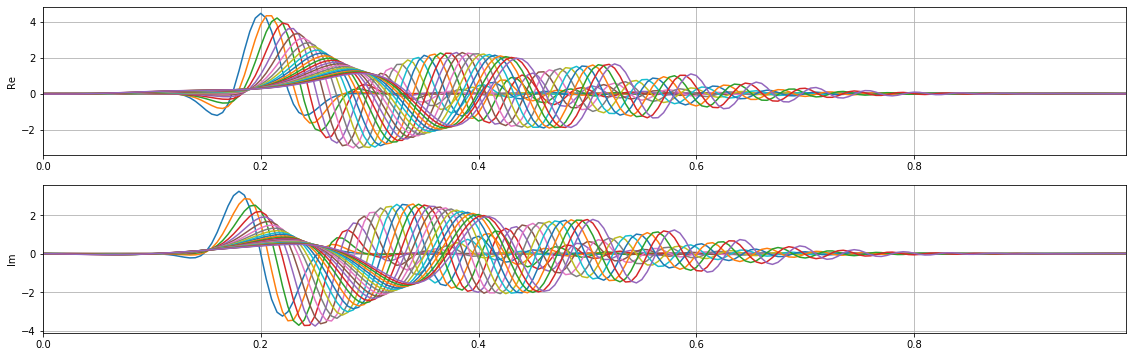

In [5]:
X, P = system.position_op, system.momentum_op
EoX, VoX = system.mean(X, gauss_packet), system.variance(X, gauss_packet)
EoP, VoP = system.mean(P, gauss_packet), system.variance(P, gauss_packet)

assert round(EoX, 12) == mu
assert round(VoX, 12) == sigma**2

assert round(EoP, 12) == p
assert round(VoP, 10) == 25**2

assert round(numpy.sqrt(VoX*VoP), 12) == 0.5  # Heisenberg relation

system.show_evolution(0.002, 0, gauss_packet, 25)

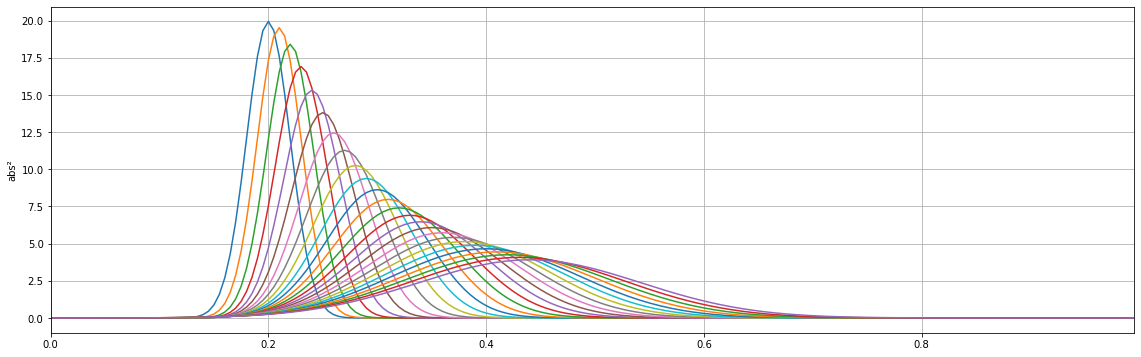

In [6]:
system.show_density_evolution(0.002, 0, gauss_packet, 25)  # spreading and moving to the right - positive momentum

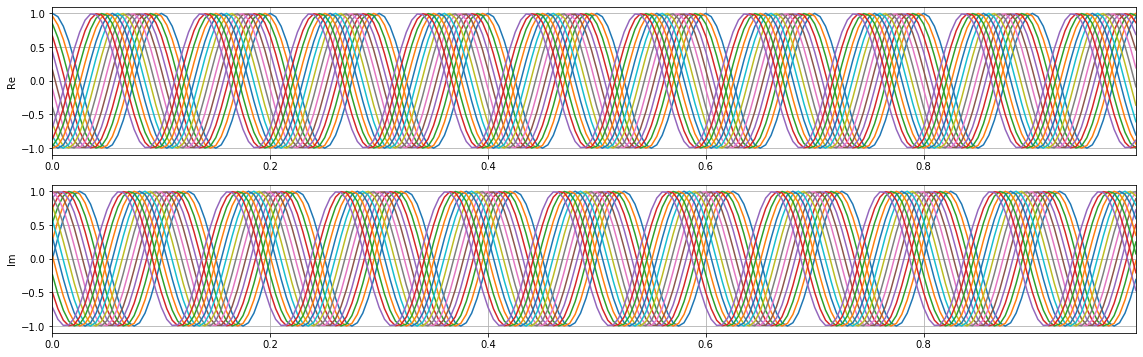

In [7]:
vec = system.space[0.45, 'fourier']

assert round(system.mean(P, vec) - system.space.fourier_label(0.45), 12) == 0  # momentum == Fourier label
assert round(system.variance(P, vec), 10) == 0  # since `vec` is an eigenstate of `P`

system.show_evolution(0.001, 0, vec, 15)  # negative momentum - 'movement' to the left